<a href="https://colab.research.google.com/github/Vaycold/Python_ML/blob/main/Reco_Algo/%231.Movielens%20with%20CF%20using%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 전처리

In [4]:
import pandas as pd

rating_url = 'https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/data/ml-1m/ratings.dat'
rating_df  = pd.io.parsers.read_csv(rating_url, names = ['user_id', 'movie_id', 'rating','time'], delimiter = '::',engine='python')
rating_df.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
movie_url = 'https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/data/ml-1m/movies.dat'
movie_df  =  pd.io.parsers.read_csv(rating_url, names = [ 'movie_id', 'title','genre'], delimiter = '::',engine='python', encoding='ISO-8859-1')
movie_df.head()

,movie_id,title,genre
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968
1,3408,4,978300275
1,2355,5,978824291


In [21]:
print(f'movie_df : {movie_df.shape}')
print(f'rating_df : {rating_df.shape}')

movie_df : (1000209, 3)
rating_df : (1000209, 4)


In [17]:
# 사용자 수 및 영화 갯수

print(f'유저 아이디 수 : {len(rating_df["user_id"].unique())}')
print(f'영화의 개수  : {len(rating_df["movie_id"].unique())}')


유저 아이디 수 : 6040
영화의 개수  : 3706


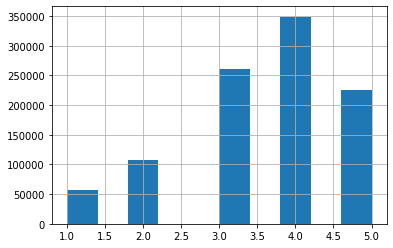

In [23]:
# 영화 점수 분포 탐색
import matplotlib.pyplot as plt
rating_df['rating'].hist()

## CF(Collaborative Filtering)

In [24]:
# Modeling

!pip install surprise

     |████████████████████████████████| 11.8MB 6.3MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617567 sha256=313438ca6bdc6d53af768486b2664afa0ee8ccd4bfde01af532173cf6e2c73dd
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [25]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

reader = Reader(rating_scale = (1,5))  # rating은 1점부터 5점까지다.
data = Dataset.load_from_df(rating_df[['user_id','movie_id','rating']] ,reader)
trainset, testset  = train_test_split(data, test_size = 0.25)

In [28]:
# KNN Algorithm

from surprise import KNNBasic
from surprise import accuracy

algo = KNNBasic( k =40, min_k = 1, sim_options = {'user_based' : True, 'name':'cosine'})
algo.fit(trainset)
predictions = algo.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [29]:
# Evaluate with RMSE
accuracy.rmse(predictions)

RMSE: 0.9785


0.9784558823126702

In [30]:
predictions = algo.test(testset[:20])
predictions 

[Prediction(uid=2262, iid=2716, r_ui=5.0, est=3.5994081787178756, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=1899, iid=1395, r_ui=4.0, est=3.875032046548435, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=2701, iid=1213, r_ui=5.0, est=4.225, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=1274, iid=2731, r_ui=4.0, est=4.575267096218099, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=2397, iid=3134, r_ui=5.0, est=4.6249062685836915, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=5393, iid=2430, r_ui=3.0, est=3.201323926130273, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=4754, iid=1468, r_ui=4.0, est=2.776753509712018, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=5848, iid=1317, r_ui=3.0, est=3.0450014330170534, details={'actual_k': 28, 'was_impossible': False}),
 Prediction(uid=4380, iid=3554, r_ui=4.0, est=3.8538849521858554, details